In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.4,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8827160493827161, Loss: 0.5907198588053385
Checkpoint 20, Accuracy: 0.8765432098765432, Loss: 0.5558506294533059
Checkpoint 30, Accuracy: 0.8765432098765432, Loss: 0.5534399880303277
Checkpoint 40, Accuracy: 0.8950617283950617, Loss: 0.483271528173376
Checkpoint 50, Accuracy: 0.9197530864197531, Loss: 0.4169679571081091
Checkpoint 60, Accuracy: 0.9197530864197531, Loss: 0.3274891464798539
Checkpoint 70, Accuracy: 0.9320987654320988, Loss: 0.29378705554538304
Checkpoint 80, Accuracy: 0.9259259259259259, Loss: 0.30769711953622325
Checkpoint 90, Accuracy: 0.9506172839506173, Loss: 0.21305289091887297
Checkpoint 100, Accuracy: 0.9506172839506173, Loss: 0.20641489382143374
Checkpoint 110, Accuracy: 0.9567901234567902, Loss: 0.18749313001279477
Checkpoint 120, Accuracy: 0.9567901234567902, Loss: 0.16290954307273584
Checkpoint 130, Accuracy: 0.9567901234567902, Loss: 0.1541410905343515
Checkpoint 140, Accuracy: 0.9691358024691358, Loss: 0.1583369043138292
Checkpoint

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.4242821  0.5743385  0.00137939]
[0. 0. 1.] <-> [7.7934456e-03 6.1526592e-04 9.9159122e-01]
[1. 0. 0.] <-> [0.9926651  0.00387583 0.0034591 ]
[1. 0. 0.] <-> [0.9967528  0.00200345 0.00124373]
[1. 0. 0.] <-> [0.98729265 0.00447669 0.00823059]
[0. 1. 0.] <-> [3.9953538e-03 9.9590176e-01 1.0290997e-04]
[0. 0. 1.] <-> [7.7525103e-03 6.1153737e-04 9.9163592e-01]
[1. 0. 0.] <-> [0.9963431  0.0022157  0.00144117]
[1. 0. 0.] <-> [0.9959115  0.00248654 0.00160205]
[0. 1. 0.] <-> [0.63097143 0.3668225  0.00220604]
[0. 0. 1.] <-> [0.39909276 0.01674286 0.58416444]
[0. 1. 0.] <-> [1.3547446e-02 9.8624647e-01 2.0613520e-04]
[1. 0. 0.] <-> [0.95500433 0.04297527 0.0020204 ]
[1. 0. 0.] <-> [0.9919093 0.0043375 0.0037532]
[1. 0. 0.] <-> [0.9807342  0.01794168 0.0013241 ]
[1. 0. 0.] <-> [0.02192633 0.00105935 0.97701436]
[0. 1. 0.] <-> [3.8119496e-03 9.9608850e-01 9.9544071e-05]
[0. 1. 0.] <-> [8.6723100e-03 9.9117661e-01 1.5118135e-04]
[1. 0. 0.] <-> [0.9950805  0.00237314 0.00254641]

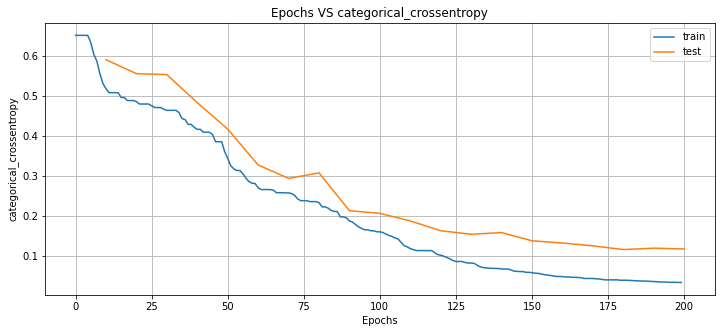

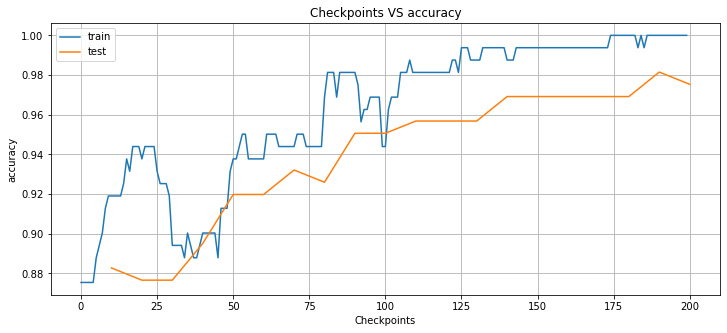

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8827160493827161, 'mean_square_error': 0.31697146692171785, 'categorical_crossentropy': 0.5907198588053385, 'essential_metrics': {0: {'tp_hit': 73, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 7}, 1: {'tp_hit': 6, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 9}, 2: {'tp_hit': 10, 'fp_hit': 7, 'tn_hit': 88, 'fn_hit': 3}}, 'checkpoint': 10} 


{'accuracy': 0.8765432098765432, 'mean_square_error': 0.3034026683376225, 'categorical_crossentropy': 0.5558506294533059, 'essential_metrics': {0: {'tp_hit': 71, 'fp_hit': 10, 'tn_hit': 18, 'fn_hit': 9}, 1: {'tp_hit': 7, 'fp_hit': 4, 'tn_hit': 89, 'fn_hit': 8}, 2: {'tp_hit': 10, 'fp_hit': 6, 'tn_hit': 89, 'fn_hit': 3}}, 'checkpoint': 20} 


{'accuracy': 0.8765432098765432, 'mean_square_error': 0.3031375288588248, 'categorical_crossentropy': 0.5534399880303277, 'essential_metrics': {0: {'tp_hit': 70, 'fp_hit': 10, 'tn_hit': 18, 'fn_hit': 10}, 1: {'tp_hit': 8, 'fp_hit': 5, 'tn_hit': 88, 'fn_hit': 7}, 2: {'tp_hit': 10, 'fp_hit': 5, 'tn_hit': 90, 'fn_h

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[ 0.81819385 -3.          0.35803452  0.49119797  3.        ]
 bias: -2.534168004989624

Neuron 1: weights:
[-0.41996074 -2.5494976  -3.          1.6805363   3.        ]
 bias: -3.0

Neuron 2: weights:
[-3.         3.         2.2201302  2.3084261 -2.5627136]
 bias: -2.5630247592926025

Neuron 3: weights:
[ 1.4778781  -3.         -2.7650127   0.49927932 -0.16145436]
 bias: 2.643542528152466

$
Layer 2
Neuron 0: weights:
[-2.9859662 -3.        -3.         3.       ]
 bias: 1.624262809753418

Neuron 1: weights:
[-3.         0.9081269  3.        -3.       ]
 bias: 1.1899691820144653

Neuron 2: weights:
[ 3.         3.        -3.        -0.4872453]
 bias: -2.0232601165771484

$

